In [1]:
# Analise de dados de Trafego em Sao Paulo

In [ ]:
# Dados colhidos entre 7:00 as 20:00 a cada 30 minutos, durante 5 dias
# link: https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil

# obs: devido ao fato da base de dados possuir poucos registros, os resultados estão sujeitos ao acaso.
# No entanto, já dá para realizar algumas descobertas

In [2]:
# =====   Importação das Bibliotecas   ===== #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Plota grafico com a quantidade de incidente por dia
def plot_graficos(dia, dados):
    if dia == 0:
        plt.barh(atributos, dados, color='orange')
        plt.title("Total")
    else:
        plt.barh(atributos, dados.loc[dados.Dia == dia].values[0][1:])
        plt.title("Dia {}".format(dia))

In [4]:
# Tratamento dos dados
base = pd.read_csv("traffic.csv", sep=";")

atributos = base.columns.tolist()
del(atributos[len(atributos)-1], atributos[0])

base.insert(0, 'Dia', np.repeat([1,2,3,4,5],27))

dict_horarios = {1: "7:00", 2: "7:30", 3: "8:00", 4: "8:30", 5: "9:00", 6: "9:30", 7: "10:00", 8: "10:30",
                 9: "11:00", 10: "11:30", 11: "12:00", 12: "12:30", 13: "13:00", 14: "13:30", 15: "14:00",
                 16: "14:30", 17: "15:00", 18: "15:30", 19: "16:00", 20: "16:30", 21: "17:00", 22: "17:30",
                 23: "18:00", 24: "18:30", 25: "19:00", 26: "19:30", 27: "20:00"}

In [5]:
# Analise do Total de Acidentes

# Total de cada incidente
somatorio = []
for i in range(len(atributos)):
    somatorio.append(base[atributos[i]].sum())

# Total de cada incidente por dia
ndias = 5
somatorio_dia = pd.DataFrame(columns=atributos)
somatorio_dia.insert(0, "Dia", "Nan")

for n in range(1, ndias+1):
    sum_dia = []
    for i in range(len(atributos)):
        sum_dia.append(base[atributos[i]].loc[base.Dia == n].sum())
    df = pd.DataFrame([sum_dia], columns=atributos)
    df.insert(0, "Dia", n)
    somatorio_dia = somatorio_dia.append(df, ignore_index=True)

In [6]:
somatorio_dia

,Dia,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
0,1,3,8,0,3,1,0,0,0,0,0,0,0,0,1,0,0
1,2,14,26,0,14,2,1,0,0,1,0,0,0,3,1,1,0
2,3,8,32,1,17,3,0,0,0,12,1,6,1,2,1,9,1
3,4,11,26,0,7,5,0,1,1,2,0,10,5,9,2,2,1
4,5,10,26,3,16,5,0,0,0,1,0,0,1,17,1,5,0


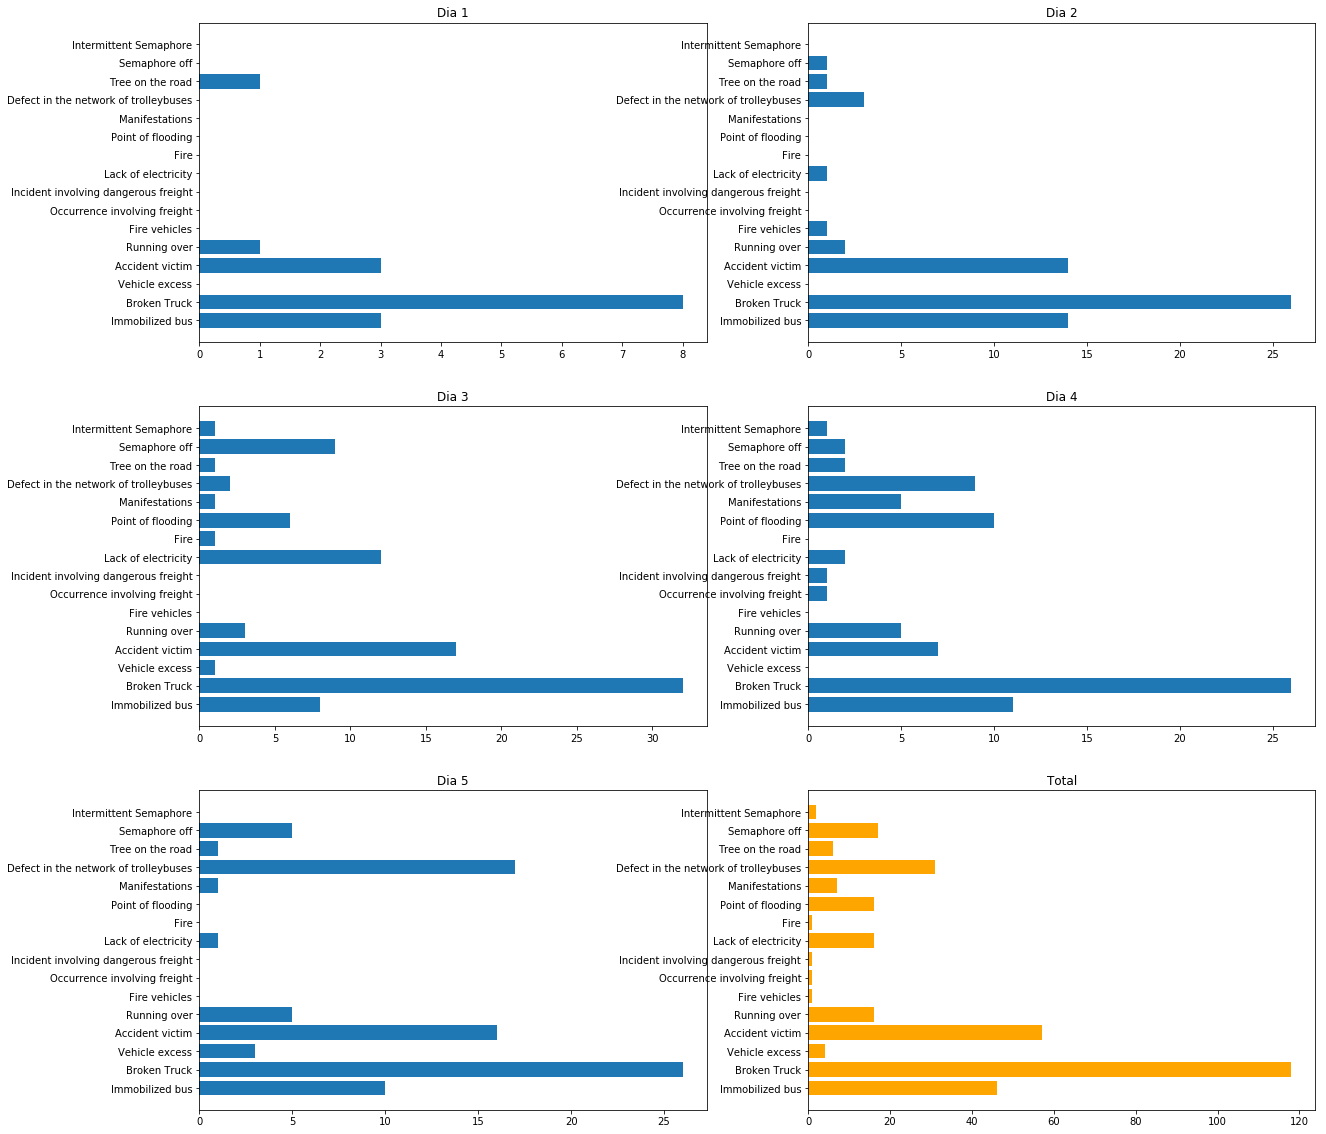

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plot_graficos(1, somatorio_dia)
plt.subplot(3,2,2)
plot_graficos(2, somatorio_dia)
plt.subplot(3,2,3)
plot_graficos(3, somatorio_dia)
plt.subplot(3,2,4)
plot_graficos(4, somatorio_dia)
plt.subplot(3,2,5)
plot_graficos(5, somatorio_dia)
plt.subplot(3,2,6)
plot_graficos(0, somatorio)

In [14]:
# =====   Analise da relação Horario e Lenditão no Transito   ===== #

base_semIncidentes = base.iloc[:]
for n in range(len(base_semIncidentes)-1, -1, -1):
    if base_semIncidentes.iloc[n, 2:18].values.sum() != 0:
        base_semIncidentes.drop(n, inplace=True)

media_hora = []
media_hora_semIncidente = []
for n in range(1, 28):
    media_hora.append(base["Slowness in traffic (%)"].loc[base["Hour (Coded)"] == n].mean())
    media_hora_semIncidente.append(base_semIncidentes["Slowness in traffic (%)"].loc[base_semIncidentes["Hour (Coded)"] == n].mean())

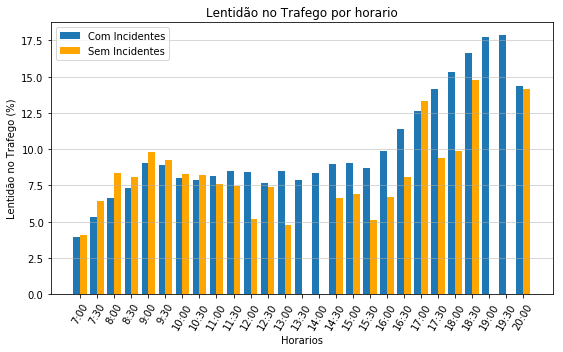

In [15]:
plt.figure(figsize=(9,5))
plt.bar(base["Hour (Coded)"].unique(), media_hora,
             label="Com Incidentes", width=0.4, align="center")
plt.bar(base["Hour (Coded)"].unique()+0.4, media_hora_semIncidente,
             label="Sem Incidentes", color="orange", width=0.4)
plt.legend()
plt.title("Lentidão no Trafego por horario")
plt.xlabel("Horarios")
plt.ylabel("Lentidão no Trafego (%)")
plt.xticks(base["Hour (Coded)"].unique()+0.2, dict_horarios.values(), rotation=60)
plt.grid(axis='y', linewidth="0.5")

In [ ]:
# Conclusão:
# Até 11:00 a ocorrência de incidentes parece não afetar a lentidão do trânsito
# A partir de 14:30, os incidentes parecem ter maior impacto sobre a lentidão do trânsito

In [20]:
# =====   Analise do Numero de Incidentes por horario   ===== #

incidentes_media = base.groupby("Hour (Coded)").mean()
incidentes_sum = base.groupby("Hour (Coded)").sum()
lentidao_media = incidentes_media["Slowness in traffic (%)"]

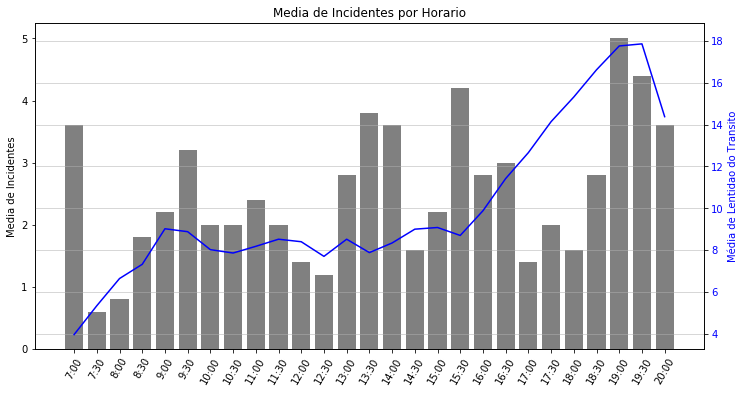

In [23]:
fig, ax1 = plt.subplots(figsize=(12,6))
for n in range(len(dict_horarios)):
    ax1.bar(dict_horarios[n+1], incidentes_media.iloc[n, 1:17].sum(), color="grey")
ax1.set_ylabel('Media de Incidentes')
ax2 = ax1.twinx()
ax2.plot(dict_horarios.values(), lentidao_media, color='b')
plt.ylim(top=max(lentidao_media)+1)
ax2.set_ylabel('Média de Lentidao do Transito', color='b')
for lb in ax2.get_yticklabels():
    lb.set_color('b')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.title("Media de Incidentes por Horario")
plt.grid(axis='y', linewidth="0.5")

In [24]:
# Plota a quantidade de um determinado incidente por horario
def plot_incidente(incidente):
    incid = incidentes_sum[incidente]
    
    plt.figure(figsize=(12,5))
    for n in range(len(dict_horarios)):
        plt.bar(dict_horarios[n+1],  incid[n+1], color="grey")
    plt.xticks(rotation=60)
    plt.yticks(list(range(min(incid), max(incid)+1)))
    plt.grid(axis='y', linewidth="0.5")
    plt.title("Numero de '{}' por Horario".format(incidente))

Opções de atributos:
 Immobilized bus
 Broken Truck
 Vehicle excess
 Accident victim
 Running over
 Fire vehicles
 Occurrence involving freight
 Incident involving dangerous freight
 Lack of electricity
 Fire
 Point of flooding
 Manifestations
 Defect in the network of trolleybuses
 Tree on the road
 Semaphore off
 Intermittent Semaphore


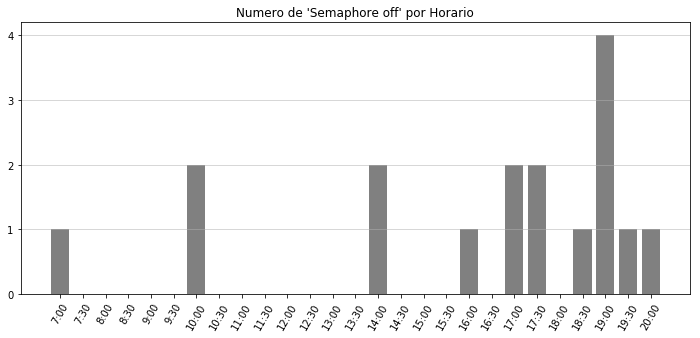

In [25]:
print("Opções de atributos:", *atributos, sep='\n ')

plot_incidente("Semaphore off")

In [26]:
# Obs:
# O incidentes de "Semáforos com problema" tem ocorrido, em média, mais no horário com maior lentidão
# Recomendável adotar medidas para evitar esse tipo de incidente, para que possivelmente se reduza a lentidão durante o horário

In [29]:
# Plota a quantidade de todos Incidentes em um determinado Horario
def plot_hora(hora):
    for k, v in dict_horarios.items():
        if v == hora:
            h = k
    plt.figure(figsize=(12,5))
    plt.barh(atributos, incidentes_sum.iloc[h-1, 1:17].values, color="grey")
    plt.xlabel("Quantidade de Incidentes")
    plt.title("Horario {}".format(hora))
    plt.grid(axis='x', linewidth="0.5")

Opções de horarios:	7:00	7:30	8:00	8:30	9:00	9:30	10:00	10:30	11:00	11:30	12:00	12:30	13:00	13:30	14:00	14:30	15:00	15:30	16:00	16:30	17:00	17:30	18:00	18:30	19:00	19:30	20:00


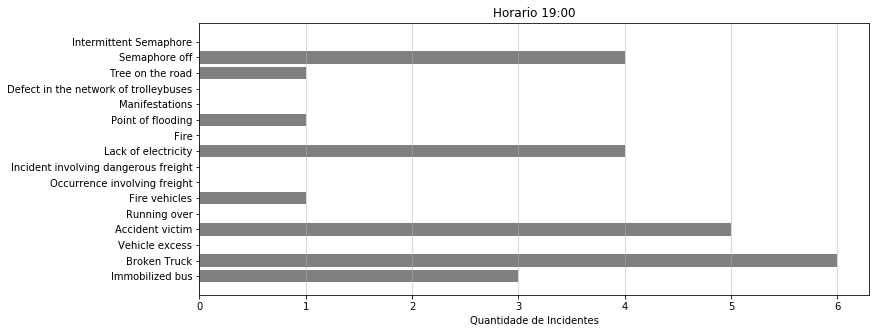

In [30]:
print("Opções de horarios:", *dict_horarios.values(), sep='\t')
plot_hora("19:00")